# Import necessary libraries

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of inputs and outputs with default values

In [21]:

inputs = {
    'DataFrame': None,  # The input DataFrame containing the dataset (to be loaded externally)
    'test_size': 0.2,  # Fraction of data to be used for testing
    'n_estimators': 100,  # Number of trees in RandomForest
    'max_depth': 10,  # Maximum depth of RandomForest trees
    'C': 1.0,  # Regularization parameter for SVC
    'kernel': 'rbf',  # Kernel type for SVC
    'gamma': 'scale',  # Kernel coefficient for SVC
    'n_neighbors': 5,  # Number of neighbors for KNN
    'weights': 'uniform',  # Weight function for KNN
    'metric': 'euclidean',  # Distance metric for KNN
    'p': 2  # Power parameter for Minkowski distance (KNN)
}

outputs = {
    'accuracy': None,  # Model accuracy
    'report': None,  # Classification report
    'cm': None,  # Confusion matrix
    'mse': None  # Mean squared error
}

# BaseClass 
EvaluationClassifier

In [22]:


class CarEvaluationClassifier:
    def __init__(self, DataFrame, test_size=inputs['test_size']):
        self.encoder = LabelEncoder()
        

        # Encode all columns
        for column in DataFrame.columns:
            DataFrame[column] = DataFrame[column].astype(str)
            DataFrame[column] = self.encoder.fit_transform(DataFrame[column])

        self.data = DataFrame.iloc[:, :-1]
        self.target = DataFrame.iloc[:, -1]

        self.prepare_data(test_size)

    def prepare_data(self, test_size=inputs['test_size']):
        self.data_train, self.data_test, self.target_train, self.target_test = train_test_split(
            self.data, self.target, test_size=test_size, random_state=42
        )

    def set_model(self, model):
        self.current_model = model
        print(f"Model set to: {type(model).__name__}")

    def evaluate(self, target_test=None, target_pred=None):
        if target_test is None:
            target_test = self.target_test
        if target_pred is None:
            target_pred = self.target_pred

        accuracy = accuracy_score(target_test, target_pred)
        report = classification_report(target_test, target_pred)
        cm = confusion_matrix(target_test, target_pred)

        print("Model Accuracy:", accuracy)
        print("\nClassification Report:\n", report)
        print("\nConfusion Matrix:")
        print(cm)

        mse = mean_squared_error(target_test, target_pred)
        print(f"Mean Squared Error: {mse:.4f}")

        return accuracy, report, cm, mse

    def display_confusion_matrix(self, cm=None):
        if cm is None:
            cm = confusion_matrix(self.target_test, self.target_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title("Confusion Matrix")
        plt.show()



## Child Class RandomForestModel


In [23]:
class RandomForestModel(CarEvaluationClassifier):
    def __init__(self, DataFrame, n_estimators=inputs['n_estimators'], max_depth=inputs['max_depth'], test_size=inputs['test_size']):
        super().__init__(DataFrame, test_size)
        self.model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    def train(self, data_train=None, target_train=None):
        if data_train is None:
            data_train = self.data_train
        if target_train is None:
            target_train = self.target_train

        self.model.fit(data_train, target_train)
        print("Training complete with RandomForest.")

        # Make predictions after training
        self.target_pred = self.model.predict(self.data_test)

## Child Class SVCModel

In [24]:

class SVCModel(CarEvaluationClassifier):
    def __init__(self, DataFrame, C=inputs['C'], kernel=inputs['kernel'], gamma=inputs['gamma'], test_size=inputs['test_size']):
        super().__init__(DataFrame, test_size)
        self.model = SVC(C=C, kernel=kernel, gamma=gamma)

    def train(self, data_train=None, target_train=None):
        if data_train is None:
            data_train = self.data_train
        if target_train is None:
            target_train = self.target_train

        self.model.fit(data_train, target_train)
        print("Training complete with SVC.")

        # Make predictions after training
        self.target_pred = self.model.predict(self.data_test)

## Child Class KNNModel

In [25]:

class KNNModel(CarEvaluationClassifier):
    def __init__(self, DataFrame, n_neighbors=inputs['n_neighbors'], weights=inputs['weights'], metric=inputs['metric'], p=inputs['p'], test_size=inputs['test_size']):
        super().__init__(DataFrame, test_size)
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

    def train(self, data_train=None, target_train=None):
        if data_train is None:
            data_train = self.data_train
        if target_train is None:
            target_train = self.target_train

        self.model.fit(data_train, target_train)
        print("Training complete with KNN.")

        # Make predictions after training
        self.target_pred = self.model.predict(self.data_test)

Instance 

Available models: RandomForest, SVC, kNN
Model set to: RandomForestClassifier
Training complete with RandomForest.
Model Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.59      0.91      0.71        11
           2       0.98      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.96       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.97      0.96      0.96       346


Confusion Matrix:
[[ 72   7   4   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]
Mean Squared Error: 0.1040


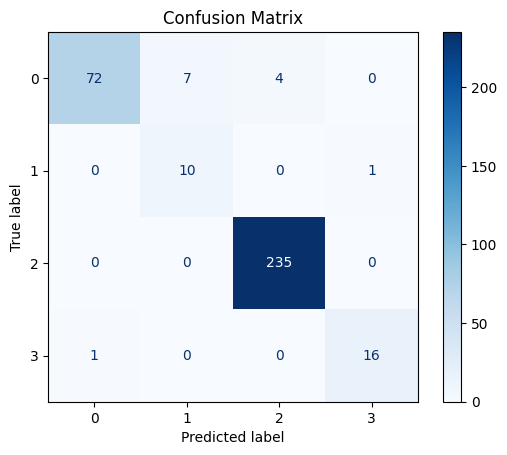

In [26]:
# Load the data
filepath = "car.data"
data = pd.read_csv(filepath, header=None)

# User selects a model
print("Available models: RandomForest, SVC, kNN")
selected_model = input("Enter the model name you want to use: ")

# Create and use the selected model
try:
    if selected_model == "RandomForest":
        model = RandomForestModel(data)
    elif selected_model == "SVC":
        model = SVCModel(data)
    elif selected_model == "kNN":
        model = KNNModel(data)
    else:
        raise ValueError("Invalid model name entered.")

    model.prepare_data()
    model.set_model(model.model)
    model.train()  # Now called from the child class
    accuracy, report, cm, mse = model.evaluate()
    model.display_confusion_matrix(cm)
    
except ValueError as e:
    print(e)